In [2]:
# for data Analysis
import pandas as pd
import numpy as np

# for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for Data Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classfier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data sets
df = pd.read_csv(r"C:\Users\value\Documents\10alytics projects\python\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The features include
- age,
- sex, 
- chest pain type (cp), 
- resting blood pressure(trestbps), 
- serum cholesterol (chol), 
- fasting blood sugar(fbs), 
- resting electrocardiographic results (restecg),
- maximum heart rate achieved (thalach), 
- exercise-induced angina (exang), 
- ST depression induced by exercise relative to rest (oldpeak), 
- the slope of the peak exercise ST segment(slope), 
- number of major vessels colored by flourosopy(ca), and 
- thalassemia (thal).
- have disease or not (target)

In [4]:
# renaming the column

df.columns= ['age','sex','chest_pain_type','resting_blood_pressure',
             'cholesterol','fast_blood_sugar','rest_ecg',
             'max_heart_rate_achieved','exercise-induced_angina','st_depression',
             'st_slope','num_major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise-induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# data verification - datatype, number of features and rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fast_blood_sugar         303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise-induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
# Statistical Analysis of the data
df.describe().round(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise-induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [7]:
# check for missing values
print(df.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fast_blood_sugar           0
rest_ecg                   0
max_heart_rate_achieved    0
exercise-induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<AxesSubplot:>

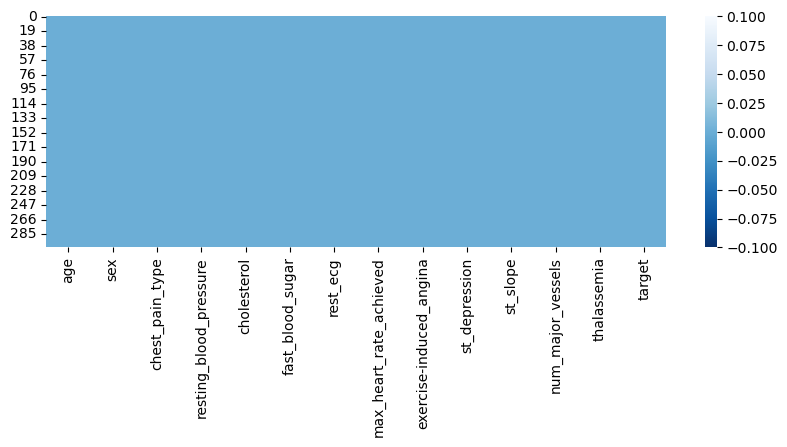

In [8]:
# Visualizing the missing values

plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### Exploratory Data Analysis

##### Univariate Analysis

In [9]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fast_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise-induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<AxesSubplot:xlabel='thalassemia'>

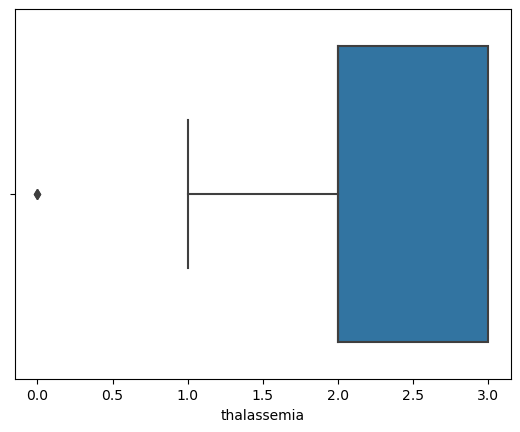

In [10]:
# check for outliers
sns.boxplot(x=df['thalassemia'])

<AxesSubplot:xlabel='cholesterol'>

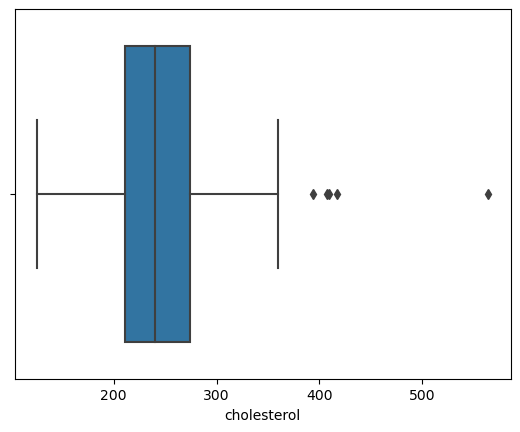

In [11]:
# check for outliers
sns.boxplot(x=df['cholesterol'])

<AxesSubplot:xlabel='resting_blood_pressure'>

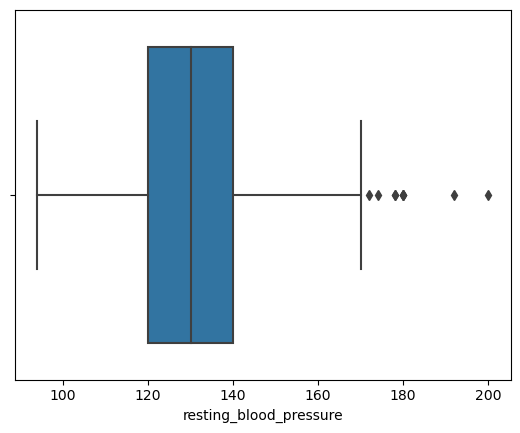

In [12]:
# check for outliers
sns.boxplot(x=df['resting_blood_pressure'])

<AxesSubplot:xlabel='max_heart_rate_achieved'>

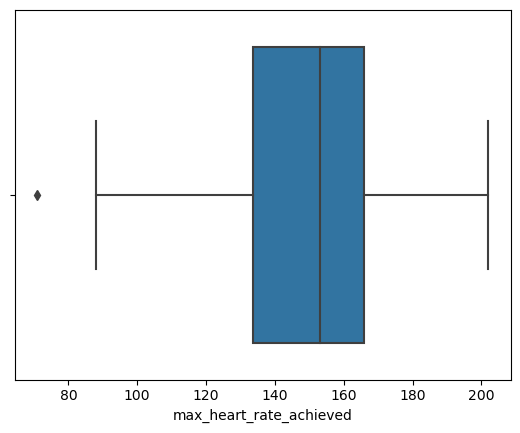

In [13]:
# check for outliers
sns.boxplot(x=df['max_heart_rate_achieved'])

Text(0.5, 1.0, 'Total Number of Patients')

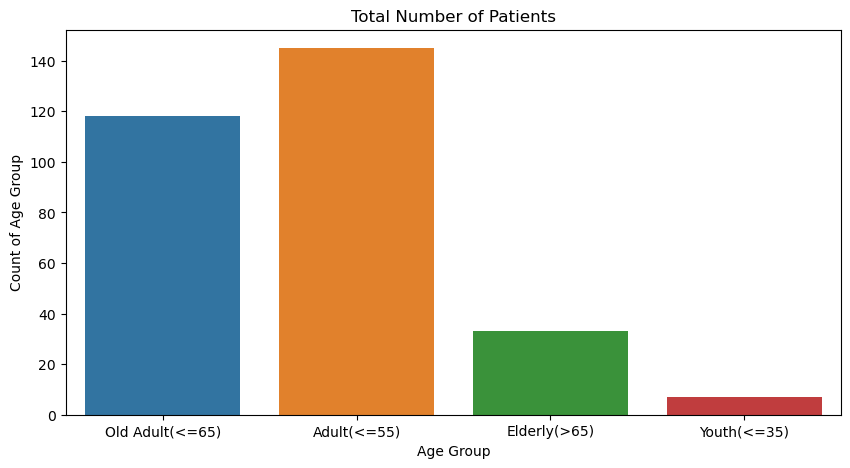

In [14]:
# Data Visualization 
# Age_Bracket

def age_bracket(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly(>65)'
df['age_bracket'] = df['age'].apply(age_bracket)

#investigate the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

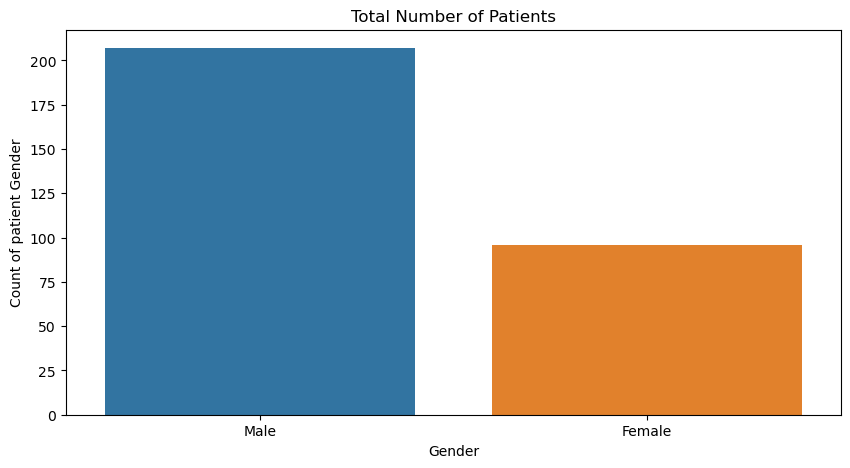

In [15]:
# Data Visualization
# sex
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
df['gender'] = df['sex'].apply(gender)

#investigate the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

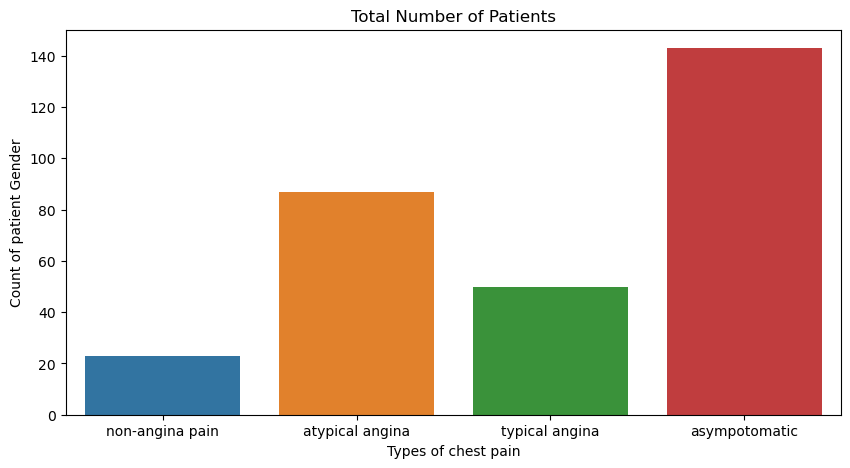

In [16]:
# Data Visualization 
# chest pain type (1. typical angina, 2. atypical angina, 3. non-angina pain 4. asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-angina pain'
    else:
        return 'asympotomatic'
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

#investigate the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Yes    165
No     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

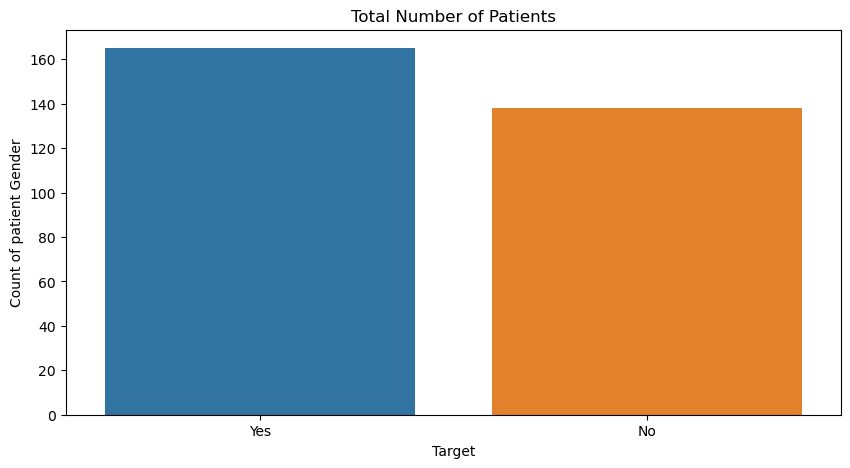

In [17]:
# Data Visualization
# target = have disease or not (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'
df['label'] = df['target'].apply(label)

# Total patient in each category
print(df['label'].value_counts())

#investigate the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

##### Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

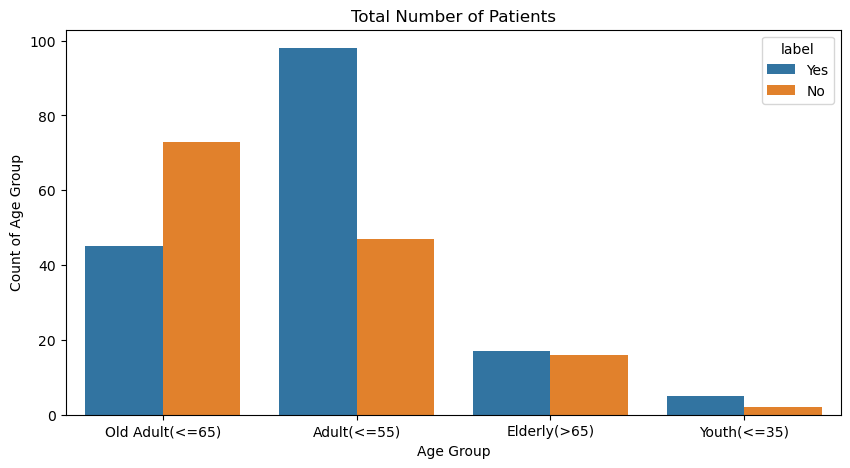

In [18]:
# focus is Target
#investigating the age group of patients by target feature
plt.figure(figsize = (10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')


Text(0.5, 1.0, 'Total Number of Patients')

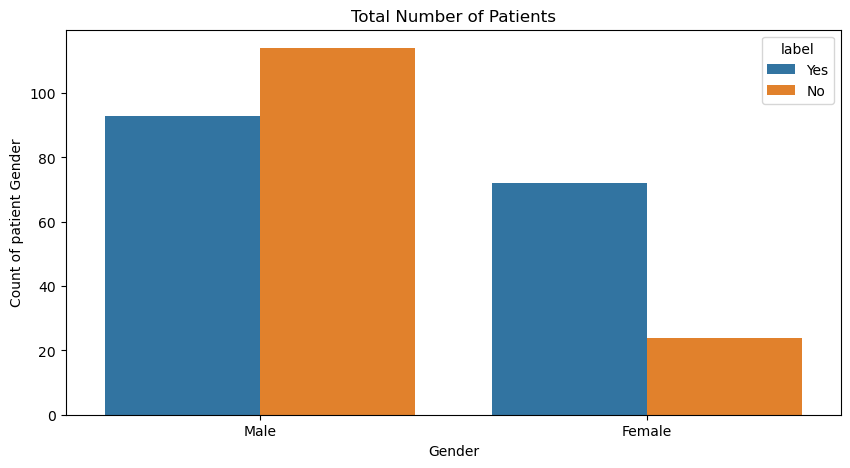

In [19]:
#investigate the gender of patients by target feature
plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

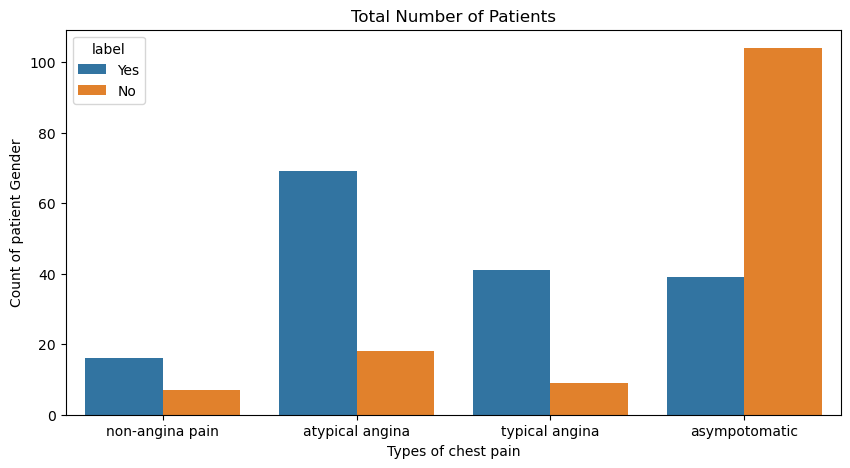

In [20]:
#investigate the gender of patients by target feature
plt.figure(figsize = (10,5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

##### Multivariate Analysis

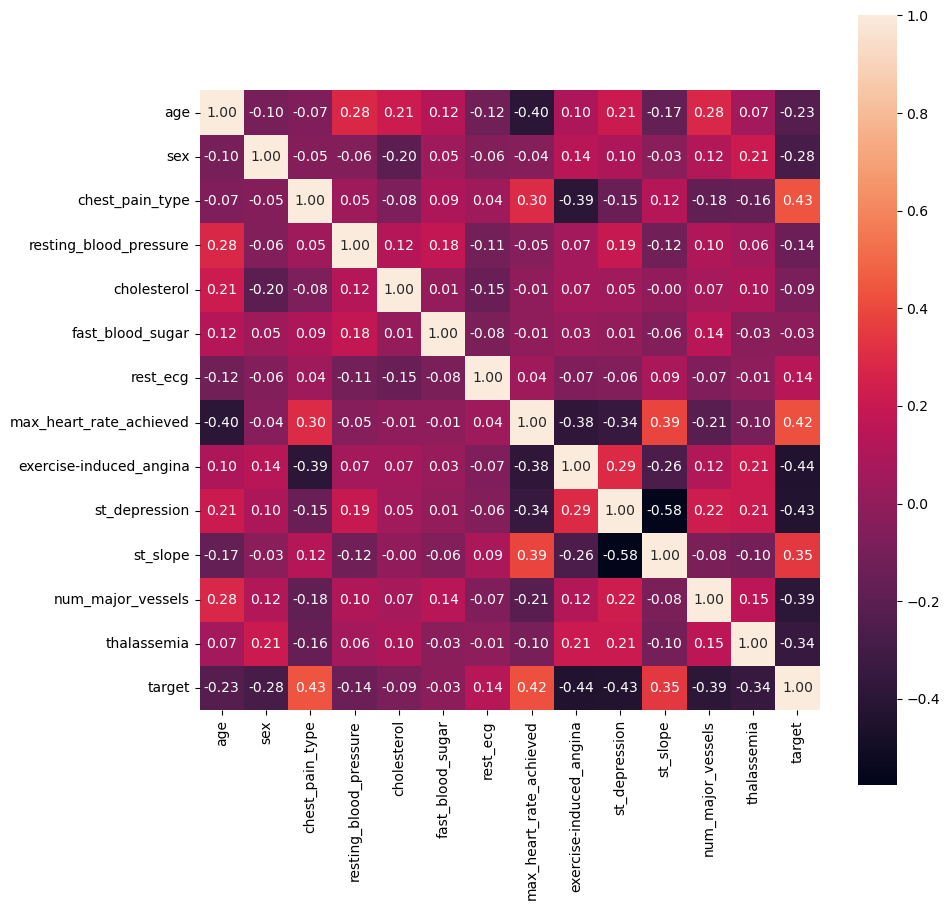

In [21]:
# correlation

plt.figure(figsize = (10,10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size':10})

#### Feature Engineering/Data Preprocessing


In [22]:
#cREATE A COPY OF THE DATA (eXCLUDE TARGET ALONGSIDE OTHER COLUMN CREATED)
df1 = df[['age','sex','chest_pain_type','resting_blood_pressure',
             'cholesterol','fast_blood_sugar','rest_ecg',
             'max_heart_rate_achieved','exercise-induced_angina','st_depression',
             'st_slope','num_major_vessels','thalassemia']]
label = df[['target']]


In [23]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise-induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [25]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fast_blood_sugar             int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise-induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [28]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol','tralasmia'
# Normalize the data

scaler = MinMaxScaler()
df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['Scaled_chol'] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['Scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['Scaled_max_heart_rate'] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'cholesterol','thalassemia','max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fast_blood_sugar,rest_ecg,exercise-induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [30]:
# spliting the dataset into train and test sets
# X = questions Y= answers

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [34]:
X_train.head()

,age,sex,chest_pain_type,fast_blood_sugar,rest_ecg,exercise-induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389


In [35]:
y_train.head()

,target
132,1
202,0
196,0
75,1
176,0


In [47]:
# Model Building

# Logistice Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print('logistics Regression')
print('Accuracy', accuracy_score(y_test, ly_pred))
print('Precision', precision_score(y_test, ly_pred))
print('Recall', recall_score(y_test, ly_pred))
print('F1-score', f1_score(y_test, ly_pred))
print('AUC-ROC', roc_auc_score(y_test, ly_pred))


logistics Regression
Accuracy 0.8524590163934426
Precision 0.8709677419354839
Recall 0.84375
F1-score 0.8571428571428571
AUC-ROC 0.8529094827586207


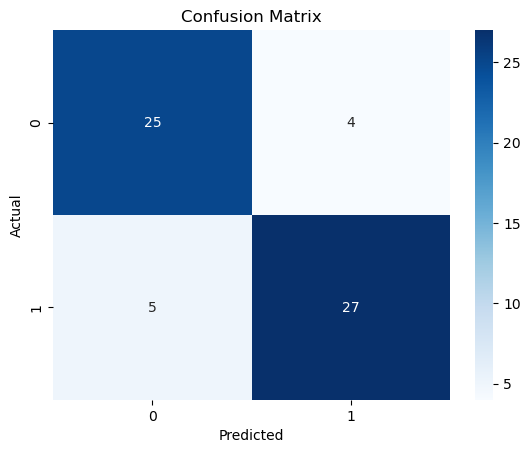

In [48]:
# create a confusion Matrix 
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Model Building 
# Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy', accuracy_score(y_test, rfy_pred))
print('Precision', precision_score(y_test, rfy_pred))
print('Recall', recall_score(y_test, rfy_pred))
print('F1-score', f1_score(y_test, rfy_pred))
print('AUC-ROC', roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy 0.8688524590163934
Precision 0.8529411764705882
Recall 0.90625
F1-score 0.8787878787878787
AUC-ROC 0.8669181034482758


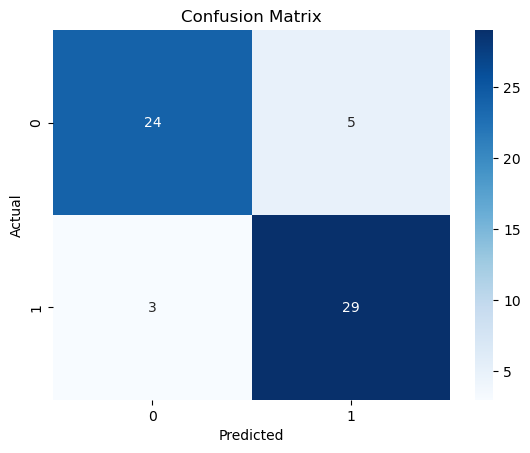

In [50]:
# create a confusion Matrix 
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# 8 Machine Learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbor'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression'],
    
            ]

In [62]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = f1_score(y_test, pred)
    
    # a_score = roc_auc_score(y_test, rfy_pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [63]:
acc_list

{'XGB Classifier': ['83.61%'],
 'Random Forest': ['85.25%'],
 'K-Nearest Neighbor': ['75.41%'],
 'SGD Classifier': ['78.69%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision Tree': ['85.25%'],
 'Logistic Regression': ['85.25%']}

In [74]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
# s1 = pd.DataFrame(acc_list, precision_list, recall_list, roc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbor,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.61%,85.25%,75.41%,78.69%,65.57%,86.89%,85.25%,85.25%


In [75]:
print('Precision ')
s1 = pd.DataFrame(precision_list)
s1.head()

Precision 


,XGB Classifier,Random Forest,K-Nearest Neighbor,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.67%,84.85%,79.31%,88.0%,65.71%,90.0%,92.59%,87.1%


In [76]:
print('Recall')
s1 = pd.DataFrame(recall_list)
s1.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbor,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.25%,87.5%,71.88%,68.75%,71.88%,84.38%,78.12%,84.38%


In [77]:
print('ROC')
s1 = pd.DataFrame(roc_list)
s1.head()

ROC


,XGB Classifier,Random Forest,K-Nearest Neighbor,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.87%,86.15%,75.41%,77.19%,68.66%,87.1%,84.75%,85.71%
